In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../08-Linear-Regression-Models/Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


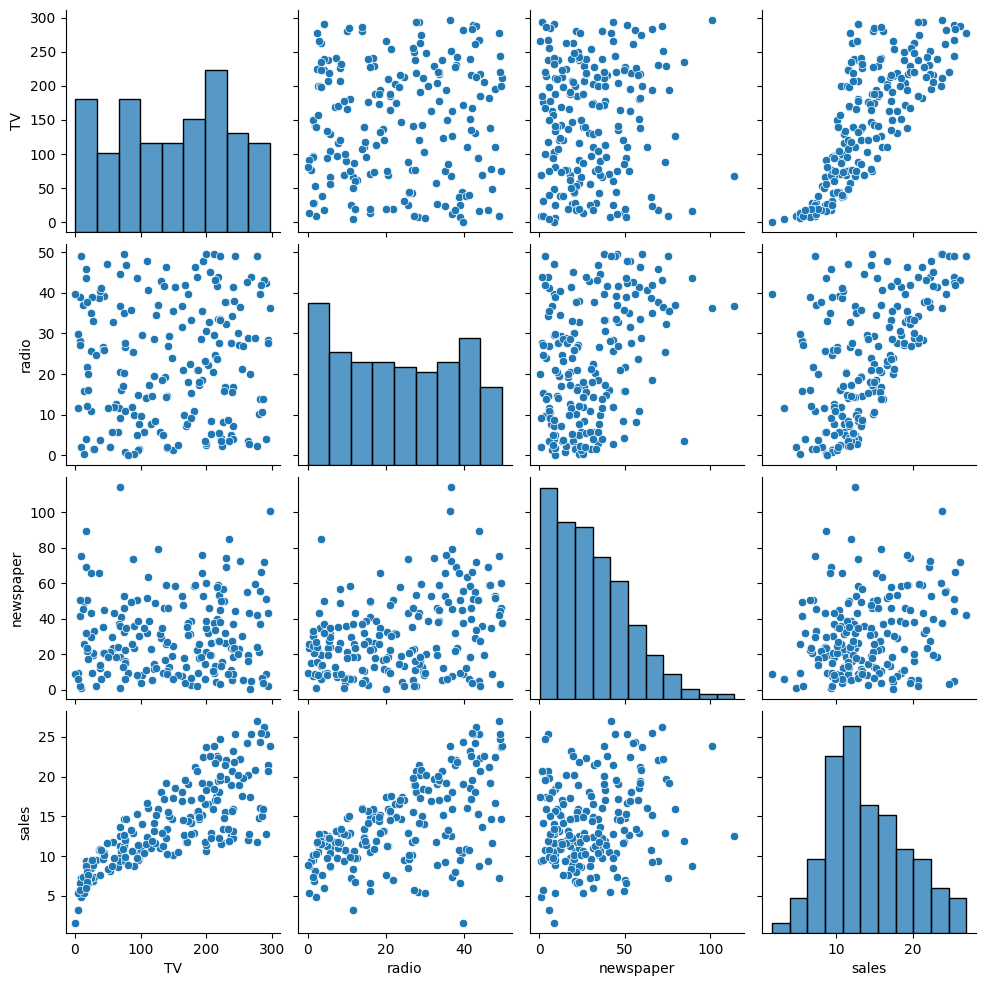

In [6]:
sns.pairplot(df)

In [7]:
X=df.drop('sales',axis=1)

In [9]:
y=df['sales']

In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
len(df)

200

In [37]:
len(X_train)

160

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(X_train,y_train)

LinearRegression()

In [41]:
test_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
df['sales'].mean()

14.0225

In [44]:
mean_absolute_error(y_test,test_pred)

1.4607567168117603

In [45]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_pred))

1.78159966153345

In [46]:
test_residuals=y_test-test_pred

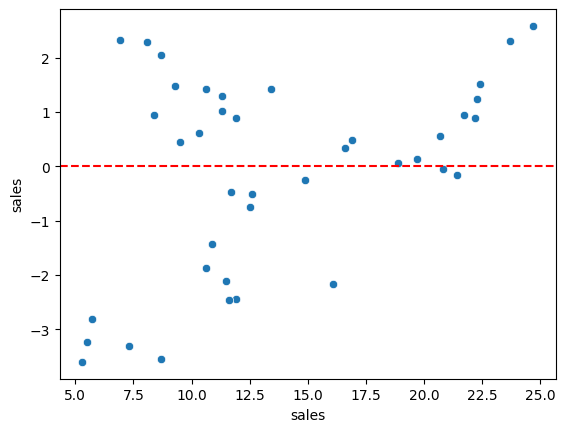

In [47]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

<AxesSubplot:xlabel='sales', ylabel='Density'>

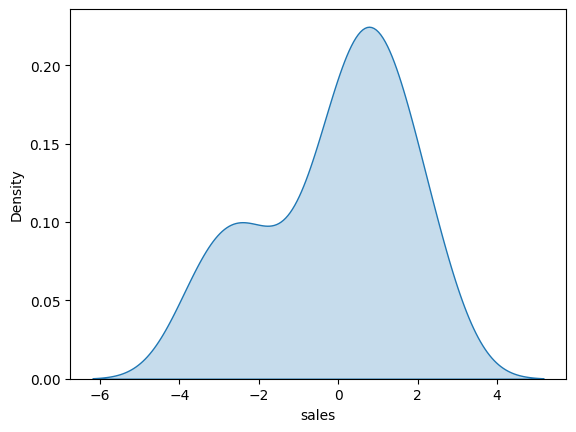

In [50]:
 sns.kdeplot(test_residuals,fill=True)

In [51]:
import scipy as sp

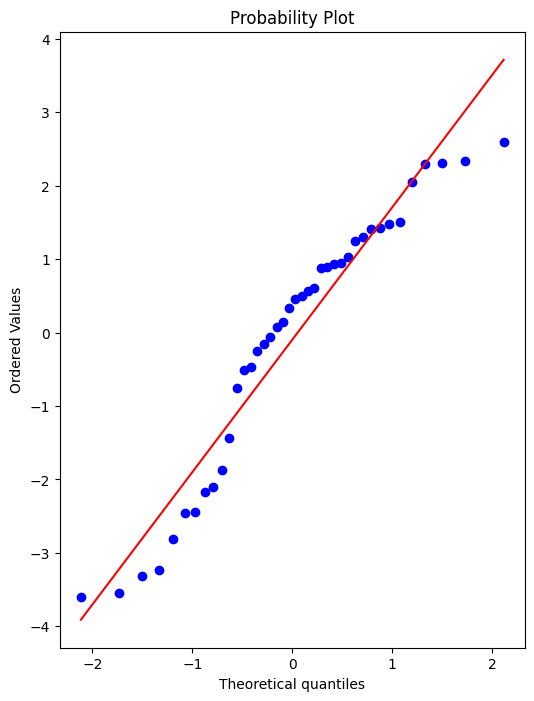

In [53]:
fig,ax=plt.subplots(figsize=(6,8))
_=sp.stats.probplot(test_residuals,plot=ax)

In [54]:
final_model=LinearRegression()

In [55]:
final_model.fit(X,y)

LinearRegression()

In [56]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [57]:
y_hat=final_model.predict(X)

In [58]:
from joblib import dump,load

In [59]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [60]:
!ls .

06-Combining-DataFrames.md	  pandas-pr4-missing-data.ipynb
bin				  pandas-pr5.ipynb
etc				  pandas-pr6.ipynb
final_sales_model.joblib	  pandas-pr7.ipynb
include				  pandas-pr8.ipynb
lib				  pandas-pr9.ipynb
lib64				  python-crash.ipynb
matplotlib-pr1.ipynb		  pyvenv.cfg
newfile.csv			  regression-pr-01.ipynb
nohup.out			  regression-pr-02.ipynb
np-practice.ipynb		  requirements.txt
pandas-pr10.ipynb		  seaborn-pr0.ipynb
pandas-pr11.ipynb		  seaborn-pr1.ipynb
pandas-pr1-filters.ipynb	  seaborn-pr2.ipynb
pandas-pr-1.ipynb		  seaborn-pr3.ipynb
pandas-pr3-basic-statistic.ipynb  share


In [61]:
loaded_model=load('final_sales_model.joblib')

In [62]:
loaded_model

LinearRegression()

In [63]:
campaign=[[149,22,12]]

In [64]:
loaded_model.predict(campaign)

/home/mustafa/Desktop/ML/first/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])